In [125]:
import pandas as pd
import numpy as np
from matplotlib import axes
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

<h1 align='center'>Laboratorio 3: Interferometría</h1>

### Parte 1

In [2]:
parte_1 = pd.read_csv('parte1.txt', delimiter='\t')

In [15]:
# Aquí vamos sumando los valores de los mínimos
parte_1['sum_N'] = 0
for i in range(1,len(parte_1['N'])):
    parte_1['sum_N'][i] = 0
    parte_1['sum_N'][i] += parte_1['sum_N'][i-1] + parte_1['N'][i]

In [20]:
x = np.linspace(parte_1['sum_N'][0], parte_1['sum_N'][len(parte_1['sum_N'])-1])
def linear(x,m,b): return m*x + b
popt_parte1, pcov_parte1 = curve_fit(linear, parte_1['sum_N'], parte_1['dN'])

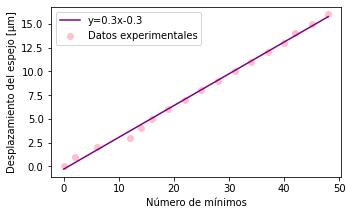

In [95]:
plt.figure(figsize=(5,5/1.61616))
plt.scatter(parte_1['sum_N'], parte_1['dN'],c='pink', label='Datos experimentales')
plt.plot(x, x*popt_parte1[0] + popt_parte1[1],c='purple', label='y={:.1f}x{:.1f}'.format(popt_parte1[0], popt_parte1[1]))
plt.xlabel('Número de mínimos')
plt.ylabel(r'Desplazamiento del espejo [µm]')
plt.legend()
plt.tight_layout()
plt.savefig('parte1.pdf')

La pendiente es la mitad de la longitud de onda por la relación, $$\lambda = \frac{2d_N}{N}.$$

In [40]:
print('La longitud de onda es {:.2f} ± {:.2f} nm '.format(2*popt_parte1[0]*1000, pcov_parte1[0][0]*1000))

La longitud de onda es 668.12 ± 0.03 nm 


### Parte 2

In [57]:
refr_vidrio = pd.read_csv('refr_vidrio.txt', delimiter='\t')
refr_vidrio['Ang_corregido rad'] = np.radians(refr_vidrio['Angulo']-2.3)

In [58]:
# Aquí vamos sumando los valores de los mínimos
refr_vidrio['sum_N'] = 0
for i in range(1,len(refr_vidrio['Minimos'])):
    refr_vidrio['sum_N'][i] = 0
    refr_vidrio['sum_N'][i] += refr_vidrio['sum_N'][i-1] + refr_vidrio['Minimos'][i]

In [63]:
def n_vidrio(t,Ns,lambda_, thetas):
    return ((2*t - Ns*lambda_)*(1 - np.cos(thetas)) + Ns**2*lambda_**2/(4*t))/((2*t*(1-np.cos(thetas)) - Ns*lambda_ ))

In [86]:
t = 5700000
lambda_ = 668.12
refr_vidrio['n_vidrio'] = n_vidrio(t, refr_vidrio['sum_N'], lambda_, refr_vidrio['Ang_corregido rad'])

In [87]:
refr_vidrio

,Angulo,Minimos,Ang_corregido rad,sum_N,n_vidrio
0,2.3,0,0.000000,0,NaN
1,4.7,5,0.041888,5,1.501290
2,5.8,5,0.061087,10,1.457458
3,6.5,5,0.073304,15,1.485564
4,7.6,6,0.092502,21,1.402766
5,8.2,4,0.102974,25,1.380607
6,8.9,5,0.115192,30,1.359026
7,9.2,5,0.120428,35,1.392666
8,10.0,6,0.134390,41,1.360469
9,10.3,5,0.139626,46,1.379948


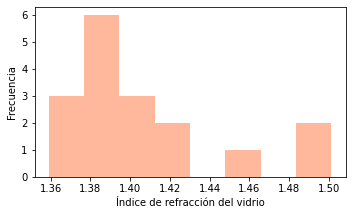

In [88]:
plt.figure(figsize=(5,5/1.61616))
n, bins, patches = plt.hist(refr_vidrio['n_vidrio'], 8, facecolor='lightsalmon', alpha=0.75)
plt.xlabel(r'Índice de refracción del vidrio')
plt.ylabel(r'Frecuencia')
plt.tight_layout()
plt.savefig('histograma_refr.pdf')

In [90]:
print('El índice de refracción del vidrio es {:.2f} ± {:.2f}'.format(np.mean(refr_vidrio['n_vidrio']), np.std(refr_vidrio['n_vidrio'])))

El índice de refracción del vidrio es 1.41 ± 0.04


### Parte 3
Los datos tomados se encuentran en el Excel. Aquí hacemos únicamente las gráficas.

In [145]:
x = np.linspace(0, max(aire['dP']))
aire = pd.read_csv('aire.txt', delimiter='\t')
popt_parte3, pcov_parte3 = curve_fit(linear, aire['dP'], aire['n'])

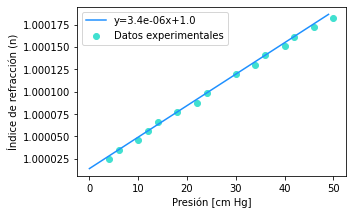

In [146]:
plt.figure(figsize=(5,5/1.61616))
plt.scatter(aire['dP'], aire['n'],c='turquoise', label='Datos experimentales')
plt.plot(popt_parte3[0]*x + popt_parte3[1], c='dodgerblue', label='y={:.1e}x+{:.1f}'.format(popt_parte3[0], popt_parte3[1]))
plt.xlabel('Presión [cm Hg]')
plt.ylabel('Índice de refracción (n)')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.legend()
plt.tight_layout()
plt.savefig('aire.pdf')

In [150]:
print('A una atmósfera, el índice de refracción es {} ± {}'.format((popt_parte3[0]*76 + popt_parte3[1]), 76*pcov_parte1[0][0]))

A una atmósfera, el índice de refracción es 1.0002760383831364 ± 0.002015309797342053


P*\Delta_m